
# Project: movies analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

tmdb movie data set containsinformation about 11000 movies collected from the movie database (TMDB)

### Question(s) for Analysis
Which movies are the most popular of all time?
,
Which year had the highest voted movies?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

in this step i will load in the data inspect its properties and then trim and clean ir for readability and analysis

### General Properties


In [8]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df.shape

(10866, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

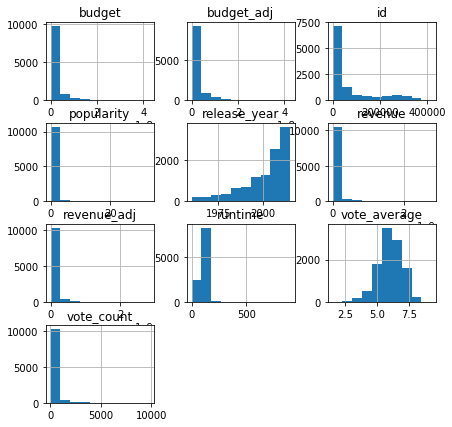

In [11]:
df.hist(figsize=(7,7));


### cleaning data from duplicated data , na rows  and unused data columns

In [12]:
# check for duplicates in the data
sum(df.duplicated())

1

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [14]:
# Drop unused columns in this data analysis
df.drop(['imdb_id','homepage','budget','revenue','tagline','overview','release_date','keywords'],axis=1 , inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [16]:
#Drop NA from data
df.dropna(inplace=True)
df.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
df.shape

(9772, 13)

<a id='eda'></a>
## Exploratory Data Analysis

In this step, I will explore the data to answer the below question and plot different visualizations to identify patterns and dependencies.

What properties are associated with highly rated movies?
There are two rows that can be used to understand the favorability of a movie, 'popularity' and 'vote_average'. I compare these columns with each other to identify which one will be more helpful in answering my question.

In [18]:
df.genres.nunique()

1916

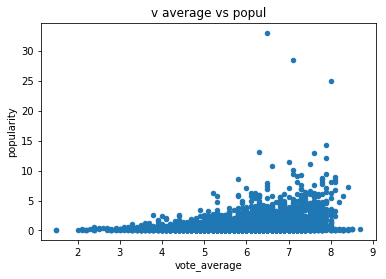

In [19]:
df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('v average vs popul')
plt.show()

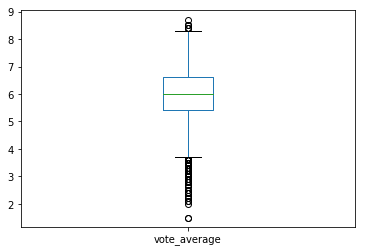

In [20]:
df['vote_average'].plot(kind='box')
plt.show()                        

I want to first check to make sure that both 'popularity' and 'vote_average' represent the same thing. The scatter plot above illustrates that both columns are positively correlated. However, as shown by the box plots, 'vote_average' is more evenly distributed and lacks any outliers. Therefore, all following analysis will be done with 'vote_average'.

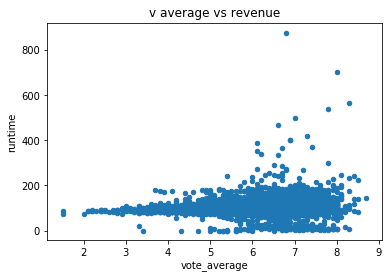

In [21]:
df.plot(x='vote_average', y='runtime', kind='scatter')
plt.title('v average vs revenue')
plt.show()

which year has the best voted movie?

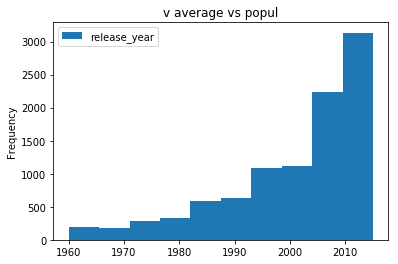

In [22]:
df.plot(x='vote_average',y='release_year',kind='hist')
plt.title('v average vs popul')
plt.show()

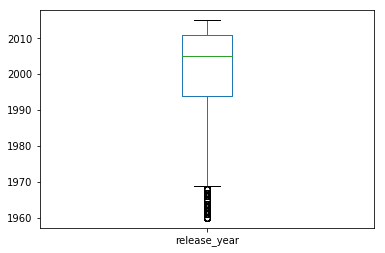

In [23]:
df['release_year'].plot(kind='box')
plt.show()                     

<a id='conclusions'></a>
## Conclusions

There are many qualities about movies that make them unique from one another. In this project, I was able to analyze these qualities and identify which properties are associated with movie popularity.

After cleaning and trimming the dataset by removing unnecessary, null, and duplicated values, I created a secondary table that broke each movie down into the separate genres it falls under.

Then I plotted a few charts to assess what will be used as the dependent variable, popularity or vote average. Because vote average was more evenly distributed, I used this as the variable that indicates favorability among viewers.

Next, I plotted various other variables against vote average and found that movies with higher vote averages tend to have higher budgets and higher revenue. I also found that movies released between 1960-1980, documentaries, history movies, and music movies tend to be voted higher than others.

Since my analysis only illustrates correlation between variables, it does not definitively conclude whether any trait can predict the vote average of a movie. That would require deeper statistical analysis that was not performed in this project.



In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0